# Visualization using Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_can = pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship', skiprows=range(20),skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df_can[df_can['OdName']=='Haiti']['Coverage']

75    Foreigners
Name: Coverage, dtype: object

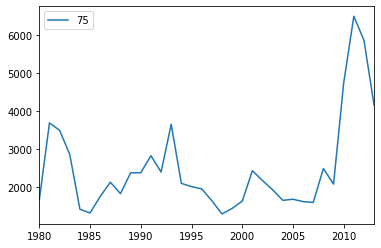

In [4]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
fig = Figure()
canvas = FigureCanvas(fig)

dfc = pd.read_csv('canada.csv')
years = list(map(str,range(1980,2014)))
dft = dfc[dfc['OdName']=='Haiti'][years].transpose()
dft.plot(kind='line')
plt.show()

None


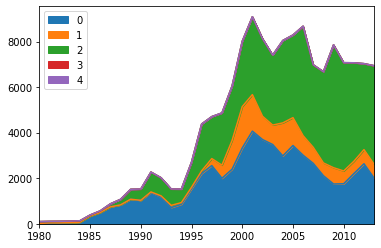

In [5]:
dfc.head()
#df2 = dfc.sort_values(['Total'], ascending=False, inplace=False, axis=0)
df_top5 = dfc.head()
years = list(map(str,range(1980,2014)))

#mylist = mylist.extend(list(years))
mylist = ['OdName']
mylist = mylist.extend(years)
print(mylist)
df_top5 = df_top5[years].transpose()
df_top5.plot(kind='area')

[193   3   0   0   0   0   0   0   0   1]
[     0.  25217.  50434.  75651. 100868. 126085. 151302. 176519. 201736.
 226953. 252170.]


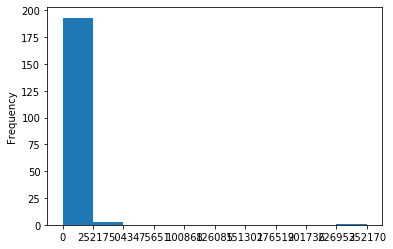

In [6]:
#df3.values
count, bins_edge = np.histogram(dfc['2009'])
print(count)
print(bins_edge)
dfc['2009'].plot(kind='hist', xticks=bins_edge)
plt.show()

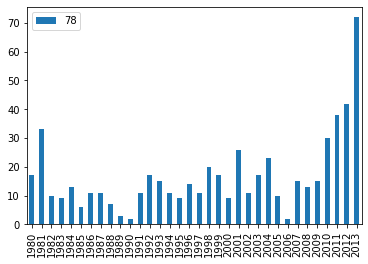

In [7]:
dft = dfc[dfc['OdName']=='Iceland'][years].transpose()
dft.plot(kind='bar')
plt.show()

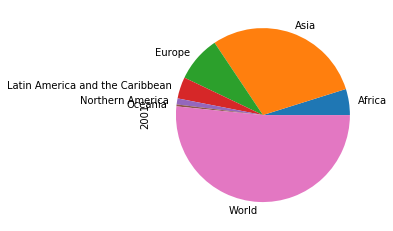

In [8]:
dft = dfc.groupby('AreaName', axis=0).sum()
dft.head()
dft['2001'].plot(kind='pie')

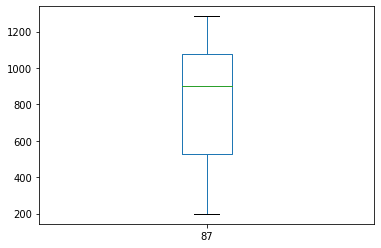

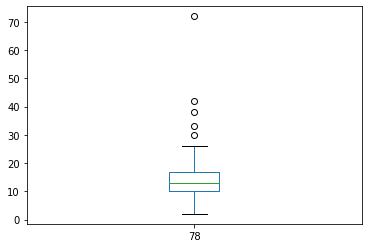

In [9]:
dfjapan = dfc[dfc['OdName']=='Japan'][years].transpose()
dfjapan.plot(kind='box')
dfjapan = dfc[dfc['OdName']=='Iceland'][years].transpose()
dfjapan.plot(kind='box')
plt.show()

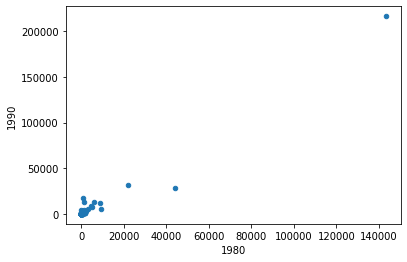

In [10]:
dft = dfc[['1980','1990']]
dft.plot(kind='scatter',x='1980',y='1990')
plt.show()

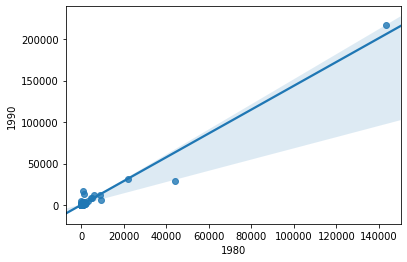

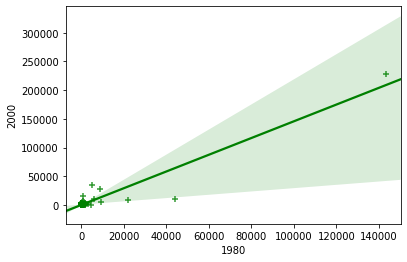

In [11]:
import seaborn as sns
sns.regplot(x='1980',y='1990', data=dfc)
plt.show()
sns.regplot(x='1980',y='2000', data=dfc,color='green', marker='+')
plt.show()

In [12]:
import os
import folium

print(folium.__version__)

import folium
from folium.features import CustomIcon

m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles='Stamen Terrain')

url = 'http://leafletjs.com/examples/custom-icons/{}'.format
icon_image = url('leaf-red.png')
shadow_image = url('leaf-shadow.png')

icon = CustomIcon(
    icon_image,
    icon_size=(38, 95),
    icon_anchor=(22, 94),
    shadow_image=shadow_image,
    shadow_size=(50, 64),
    shadow_anchor=(4, 62),
    popup_anchor=(-3, -76)
)

marker = folium.Marker(
    location=[45.3288, -121.6625],
    icon=icon,
    popup='Mt. Hood Meadows'
)


m.add_child(marker)

m.save(os.path.join('results', 'CustomIcon.html'))

m

0.11.0


In [13]:
world_map=folium.Map()
world_map

In [14]:
mymap=folium.Map(location=[-6.364260, 106.827025],zoom_start=12,tiles="Stamen Terrain")
mymap


In [15]:
np.array([[0.01, 0.01, 0.01]]).shape


(1, 3)

In [16]:
import numpy as np
from folium.plugins import HeatMap

data = (
    np.random.normal(size=(100, 3)) *
    np.array([[0.1, 0.1, 0.1]]) +
    np.array([[-6.364260, 106.827025, 1]])
)


#print(data.tolist())

HeatMap(data.tolist()).add_to(mymap)

mymap.save(os.path.join('results', 'HeatmapUI.html'))

mymap



In [17]:
import json
import pandas as pd
import requests


def my_color_function(feature):
    """Maps low values to green and high values to red."""
    if unemployment_dict[feature['id']] > 7:
        return '#ff0000'
    elif unemployment_dict[feature['id']] > 4:
        return '#ffff00'
    else:
        return '#008000'
    
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
us_states = f'{url}/us-states.json'

US_Unemployment_Oct2012 = f'{url}/US_Unemployment_Oct2012.csv'
unemployment = pd.read_csv(US_Unemployment_Oct2012)
unemployment_dict = unemployment.set_index('State')['Unemployment']


geo_json_data = json.loads(requests.get(us_states).text)

m = folium.Map([43,-100], zoom_start=4, tiles="cartodbpositron")

#folium.GeoJson(geo_json_data).add_to(m)
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': my_color_function(feature),
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)


#print(unemployment_dict)


m.save(os.path.join('results', 'us-states.html'))
m




In [22]:
import json
import requests


def my_color_function(feature):
    print(feature['properties']['Propinsi'])
    prov = feature['properties']['Propinsi']
    if "O" in  prov:
        return '#ee0000'
    elif "U" in  prov:
        return '#00ee00'
    elif "E" in  prov:
        return '#0000ee'
    else:
        return '#eeee00'

    
    
url = 'https://raw.githubusercontent.com/superpikar/indonesia-geojson/master'
ina_prov = f'{url}/indonesia-province-simple.json'

geo_json_data = json.loads(requests.get(ina_prov).text)


m = folium.Map([0, 115], zoom_start=4.5, tiles="cartodbpositron")

folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': my_color_function(feature),
        'color': 'blue',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)

#folium.GeoJson(geo_json_data).add_to(m)
#print(geo_json_data)

m.save(os.path.join('results', 'indonesia.html'))

m



IRIAN JAYA TIMUR
IRIAN JAYA TIMUR
NUSATENGGARA BARAT
GORONTALO
SULAWESI TENGGARA
DAERAH ISTIMEWA YOGYAKARTA
JAWA TENGAH
PROBANTEN
JAWA TIMUR
MALUKU UTARA
MALUKU
KALIMANTAN SELATAN
KALIMANTAN BARAT
SULAWESI SELATAN
DKI JAKARTA
JAWA BARAT
IRIAN JAYA TENGAH
NUSA TENGGARA TIMUR
BALI
RIAU
SULAWESI TENGAH
KALIMANTAN TIMUR
SULAWESI UTARA
IRIAN JAYA BARAT
SUMATERA UTARA
BANGKA BELITUNG
SUMATERA BARAT
KALIMANTAN TENGAH
SUMATERA SELATAN
JAMBI
LAMPUNG
BENGKULU
DI. ACEH
IRIAN JAYA TIMUR
NUSATENGGARA BARAT
GORONTALO
SULAWESI TENGGARA
DAERAH ISTIMEWA YOGYAKARTA
JAWA TENGAH
PROBANTEN
JAWA TIMUR
MALUKU UTARA
MALUKU
KALIMANTAN SELATAN
KALIMANTAN BARAT
SULAWESI SELATAN
DKI JAKARTA
JAWA BARAT
IRIAN JAYA TENGAH
NUSA TENGGARA TIMUR
BALI
RIAU
SULAWESI TENGAH
KALIMANTAN TIMUR
SULAWESI UTARA
IRIAN JAYA BARAT
SUMATERA UTARA
BANGKA BELITUNG
SUMATERA BARAT
KALIMANTAN TENGAH
SUMATERA SELATAN
JAMBI
LAMPUNG
BENGKULU
DI. ACEH
